# EDA MID EXAM

---------------------------

# SECTION A: 8 MARKS

--------------

### 1. What is the difference between missing value and an outlier? (8 MARKS)

Outlier is the value far from the main group. Missing value is the value of blank. We often meet them when we analyze large size data.

Outlier and missing value are also called "abnormal value", "noise", "trash", "bad data" and "incomplete data". Some people dislike them because when there are these data in the data set, we cannot make beautiful statistical model or the software outputs error.

Outlier and missing value are often removed as unnecessary data. But the removal may remove the important information because outlier and missing value express some facts. And there are cases that we need to understand the reason of the mechanism of such data.

# SECTION B: 17 MARKS

-------------

### Data Set Information: 

The time period of this dataset is from 2010 to 2018 when this notebook was written. It contains 36 columns that describe various properties of the volcano as well as data related to economic and human impact of the eruption. Properties that I feel are relevant and worthy of displaying on a marker pop up are "Year", "Name", "Country", "Latitude", "Longitude", "Type" although there are some tempting ones such as 'TOTALDAMAGEMILLIONSDOLLARS' and 'TOTALHOUSES_DESTROYED' that I chose to not include. This particular slice in time only contains 63 observations. The NOAA eruptions data is not real time nor is it updated fully as seen in the many null fields. I believe the data is entered as NOAA becomes aware of various situations related to that event.



* Year	

* TSU	

* EQ	

* Name	

* Elevation	

* Type	

* Status	

* Time	

* VEI	

* Agent	

* DEATHS	

* DEATHS_DESCRIPTION	

* MISSING	

* MISSING_DESCRIPTION	

* INJURIES	

* INJURIES_DESCRIPTION	

* DAMAGE_MILLIONS_DOLLARS	

* DAMAGE_DESCRIPTION	

* HOUSES_DESTROYED	

* HOUSES_DESTROYED_DESCRIPTION	

* TOTAL_DEATHS	

* TOTAL_DEATHS_DESCRIPTION	

* TOTAL_MISSING	

* TOTAL_MISSING_DESCRIPTION	

* TOTAL_INJURIES	

* TOTAL_INJURIES_DESCRIPTION	

* TOTAL_DAMAGE_MILLIONS_DOLLARS	

* TOTAL_DAMAGE_DESCRIPTION	

* TOTAL_HOUSES_DESTROYED	

* TOTAL_HOUSES_DESTROYED_DESCRIPTION	

* Latitude	

* Longitude	

* Country


In [ ]:
# Kindly change the below cells from markdown to code and execute it 

import pandas as pd

import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)

df=pd.read_csv("data_set.csv")

df.head()


### 2. Read the dataset and answer the below questions
  
  
 A. Compare the 'Country' and 'Status' variable and provide inferences about the volcanic eruptions. (5 marks) 
 
 B. Drop the columns which contain more than 50% of null values, create a new dataframe called `data_new` (7 MARKS)

 C. Display pairplot for only the numerical variables, state your observations with respect to skewness (5 MARKS)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data=pd.read_csv('volcano_data_2010_new.csv')
data.head()

,Year,TSU,EQ,Name,Elevation,Type,Status,Time,VEI,Agent,...,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,Latitude,Longitude,Country
0,Jan 2010,NaN,NaN,Tungurahua,5023,Stratovolcano,Historical,D1,3.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.467,-78.442,Ecuador
1,Mar 2010,NaN,NaN,Eyjafjallajokull,1666,Stratovolcano,Historical,D1,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.630,-19.620,Iceland
2,May 2010,NaN,NaN,Pacaya,2552,Complex volcano,Historical,D1,1.0,T,...,1.0,NaN,NaN,NaN,1.0,3.0,1.0,14.381,-90.601,Guatemala
3,May 2010,TSU,EQ,Sarigan,538,Stratovolcano,Holocene,U,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.708,145.780,United States
4,Aug 2010,NaN,NaN,Karangetang [Api Siau],1784,Stratovolcano,Historical,D1,3.0,NaN,...,NaN,5.0,1.0,NaN,NaN,NaN,1.0,2.780,125.480,Indonesia


##### A. Compare the 'Country' and 'Status' variable and provide inferences about the volcanic eruptions. (5 marks)

In [32]:
Country_vs_Status = pd.crosstab(index=data["Country"], columns=data["Status"])
Country_vs_Status

Status,Historical,Holocene,Tephrochronology
Country,,,
Cape Verde,1,0,0
Chile,1,1,0
Ecuador,3,0,0
Eritrea,0,1,0
Guatemala,2,0,0
Iceland,2,0,0
Indonesia,17,9,0
Italy,2,0,0
Japan,5,0,0


* Indonesia has the highly affected by volcanic eruptions, Hystorical and Holocene are the two status types of volcanic eruptions that occur frequently compared to Tephrochronology.

##### B. Drop the columns which contain more than 50% of null values, create a new dataframe called `data_new` (7 MARKS)

In [33]:
data_new = data.loc[:, data.isnull().mean() <= .5]
data_new.columns

Index(['Year', 'Name', 'Elevation', 'Type', 'Status', 'Time',
       'DAMAGE_DESCRIPTION', 'TOTAL_DAMAGE_DESCRIPTION', 'Latitude',
       'Longitude', 'Country'],
      dtype='object')

In [34]:
for col in data_new.columns:
    if data_new[col].isnull().sum():
        print("Missing percentage in ",col," is ",round((data_new[col].isnull().sum())*100/data_new.shape[0],2))

Missing percentage in  DAMAGE_DESCRIPTION  is  34.92
Missing percentage in  TOTAL_DAMAGE_DESCRIPTION  is  38.1


##### C. Display pairplot for only the numerical variables, state your observations with respect to skewness (5 MARKS)

In [35]:
# Drop non-numerical variables
numerical = list(set(data_new.columns) - set(['State', 'Type','Status', 'Time', 'Country', 'Name']))

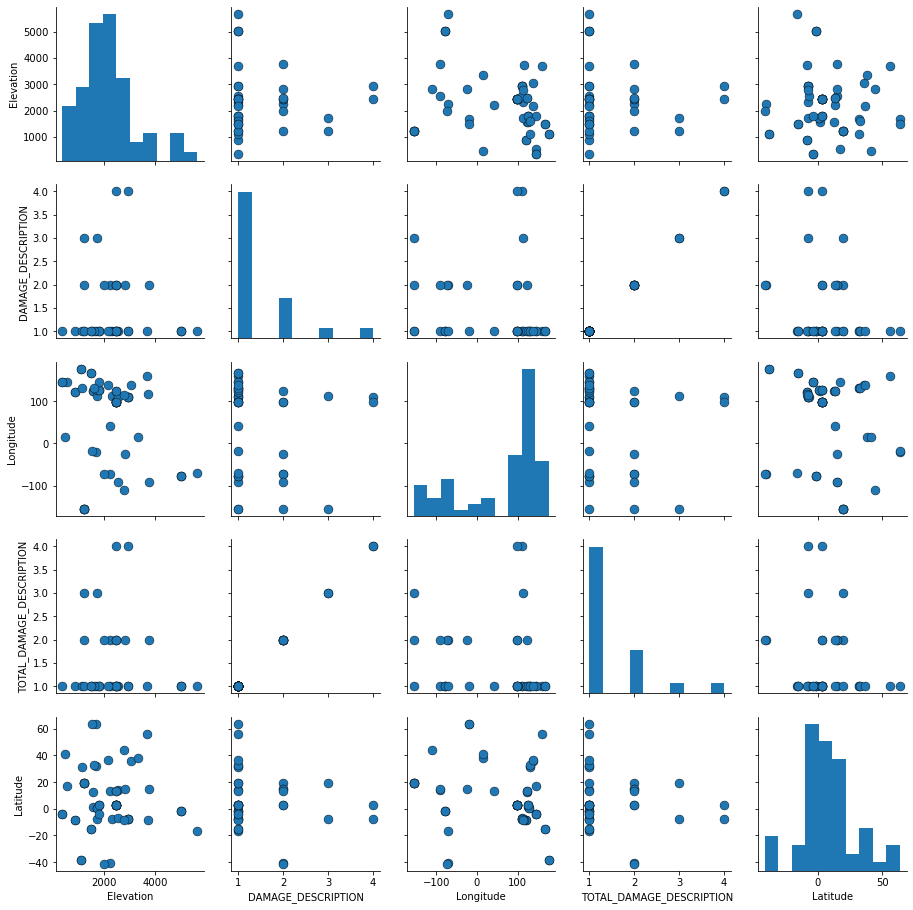

In [36]:
sns.pairplot(data_new[numerical], kind="scatter", palette="Set2",plot_kws=dict(s=80, edgecolor="black", linewidth=0.4))
plt.show()

* The variables are higly skewed. Most of the distribution is right tailed. Variables can be transformed to bring the distribution to normality.

# SECTION C: 25 MARKS

### 3. Using the same dataset answer the below questions
  
  
 a. Construct a correlation matrix for only the numerical variables, state your observations (8 MARKS)
  
 b. Convert the categorical variables into numeric (Name, Country, Type, Status and Time) and check for the data types (8 MARKS)
  
 c. Create box plots to visualize the distribution statistics of the features on the basis of the variable 'Country', state your observations (9 MARKS)"

##### a. Construct a correlation matrix for only the numerical variables, state your observations (8 MARKS)

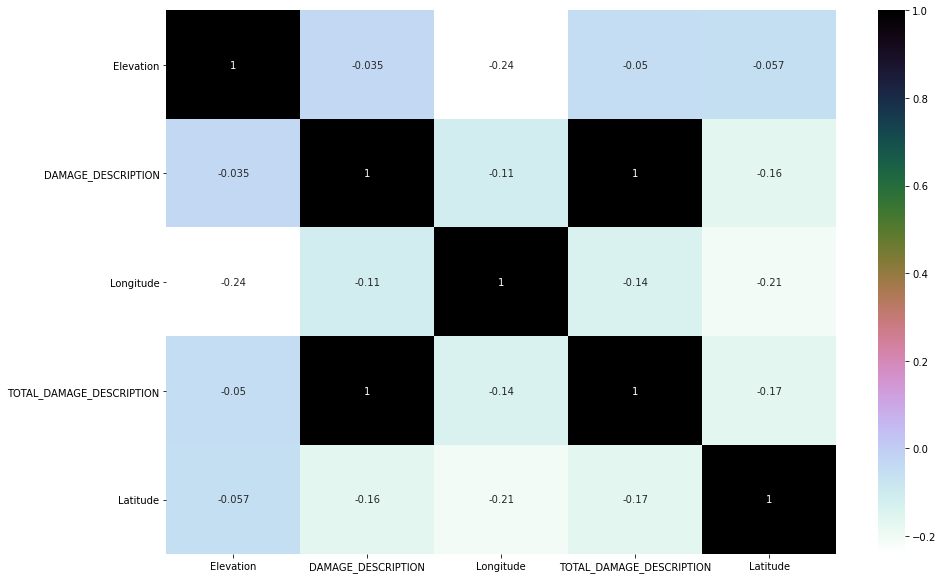

In [37]:

# Drop non-numerical variables
numerical = list(set(data_new.columns) - set(['State', 'Type','Status', 'Time', 'Country', 'Name']))

plt.figure(figsize=(15,10)) 

corr_matrix = data_new[numerical].corr()
sns.heatmap(corr_matrix,annot=True,cmap='cubehelix_r')


Total Damage Million Dollars - Deaths are highly correlated with each other

##### b. Convert the categorical variables into numeric (Name, Country, Type, Status and Time) and check for the data types (8 MARKS)

In [39]:
from sklearn.preprocessing import LabelEncoder

In [42]:
number = LabelEncoder()
data_new['Name'] = number.fit_transform(data_new['Name'])
data_new['Country'] = number.fit_transform(data_new['Country'])
data_new['Type'] = number.fit_transform(data_new['Type'])
data_new['Status'] = number.fit_transform(data_new['Status'])
data_new['Time'] = number.fit_transform(data_new['Time'])

data_new.head()

<ipython-input-42-b388526164f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Name'] = number.fit_transform(data_new['Name'])
<ipython-input-42-b388526164f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Country'] = number.fit_transform(data_new['Country'])
<ipython-input-42-b388526164f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,Year,Name,Elevation,Type,Status,Time,DAMAGE_DESCRIPTION,TOTAL_DAMAGE_DESCRIPTION,Latitude,Longitude,Country
0,Jan 2010,35,5023,4,0,0,1.0,1.0,-1.467,-78.442,2
1,Mar 2010,7,1666,4,0,0,NaN,NaN,63.630,-19.620,5
2,May 2010,26,2552,1,0,0,1.0,1.0,14.381,-90.601,4
3,May 2010,31,538,4,1,4,NaN,NaN,16.708,145.780,14
4,Aug 2010,13,1784,4,0,0,NaN,NaN,2.780,125.480,6


In [43]:
data=pd.read_csv('volcano_data_2010_new.csv')
data_dum=pd.get_dummies(data,columns=['Name', 'Country', 'Type', 'Status','Time'])
data_dum.shape

(63, 97)

In [48]:
data_new['Year'] = pd.to_datetime(data_new['Year'],infer_datetime_format=True) 
data_new = data_new.set_index(['Year'])

In [49]:


data_new.dtypes.value_counts()

int64      6
float64    4
dtype: int64

##### c. Create box plots to visualize the distribution statistics of the features on the basis of the variable 'Country', state your observations (9 MARKS)"

IndexError: too many indices for array

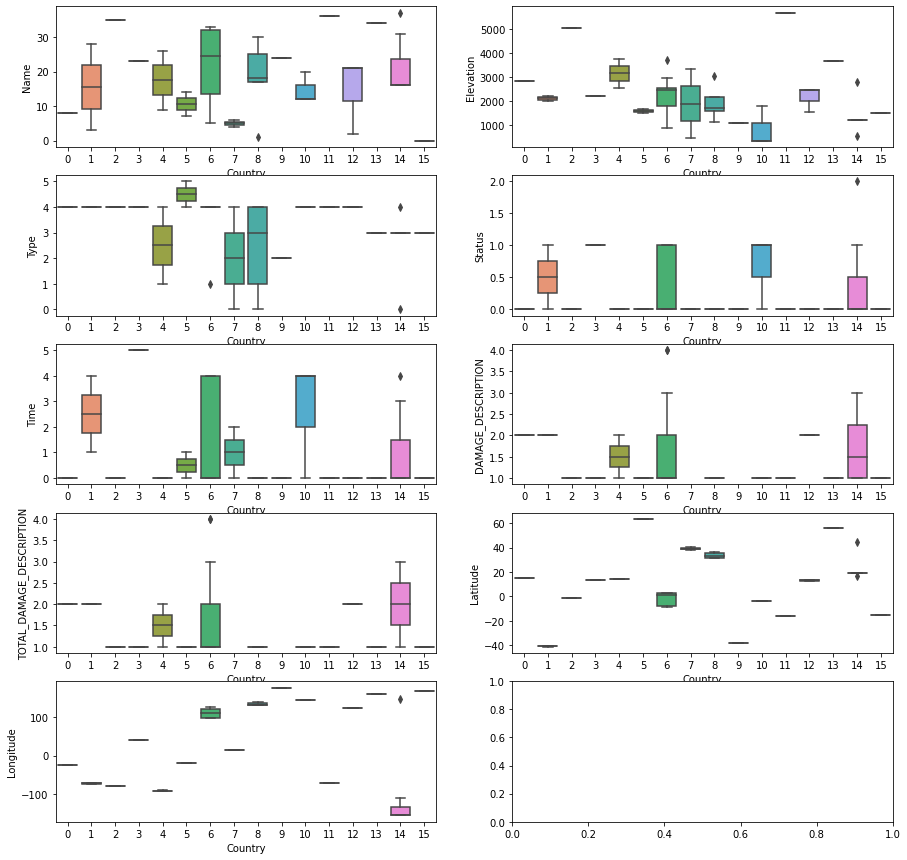

In [50]:
## Generating 5*2 matrix of box plots
fig, axes = plt.subplots(5, 2, figsize = (15,15))
axes = axes.flatten()

for i in range(0,len(data_new.columns)-1):
    sns.boxplot(x="Country", y=data_new.iloc[:,i], data=data_new, orient='v', ax=axes[i])

fig.delaxes(axes[1,1])
plt.tight_layout()
plt.show()

* The whole dataset is highly skewed. Outliers are present in the dataset, As Volcano eruptions are rarely occuring natural calamity, we are not imputing the outliers. Indonesia is the worst affected nation due to Volcanic eruptions.